In [17]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 

import nltk
from nltk.corpus import stopwords

import matplotlib.pylab as plt
from wordcloud import WordCloud

# creating empty reviews list 
iphone_reviews=[]
#forest = ["the","king","of","jungle"]

for i in range(1,2):
    ip=[]  
    #url="https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_2?showViewpoints=1&pageNumber="+str(i)
    url = "https://www.amazon.in/All-New-Kindle-reader-Glare-Free-Touchscreen/product-reviews/B0186FF45G/ref=cm_cr_getr_d_paging_btm_3?showViewpoints=1&pageNumber="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content
    reviews = soup.findAll("span",{"class":"a-size-base review-text review-text-content"})# Extracting the content under specific tags
    for i in range(len(reviews)):
        ip.append(reviews[i].text)  
    iphone_reviews=iphone_reviews+ip  # adding the reviews of one page to empty list which in future contains all the reviews




In [10]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(iphone_reviews)



# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)



# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")

stop_words = stopwords.words('english')



In [11]:
iphone_reviews
# stop_words

['\n\n  I\'m writing this after using this kindle for six months.WHAT THIS KINDLE HAVE AND PAPERWHITE DOESN\'T:::  this kindle has a "Voiceview screen reader", it means if you connect to a bluetooth speaker it will read the book aloud for you. this option is not there in paperwhite..battery::: at beginning when you charge once you can use it for a week, but no it drains in five to six days an it also depends on how much you read. also, if you switch on wifi then battery may drain in two days or even quicker. you should e on airplane mode to get good battery life. when you connect to your computer it takes one and half hour to two hours to charge full. when it got fully charged indicating light turn to green from orange.screen::: it have touch screen, which is so sensitive. when you are reading if a house fly sits on screen it activates the screen and it will show the meaning of the word where it sat(long touch to see a meaning of unknown word). you can slide even with a pen cap. screen

In [18]:
with open("C:\\Data science\\Data sets\\TEXT MINING\\stop.txt","r") as sw:
    stopwords = sw.read()
# stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords = stopwords.split("\n")

temp = ["this","is","awsome","Data","Science"]
[i for i in temp if i not in "is"]

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]



# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)



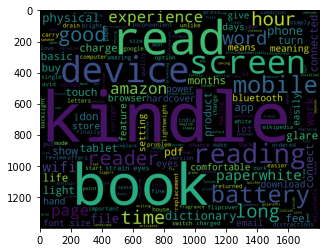

In [19]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud


wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)



In [6]:
# positive words # Choose the path for +ve words stored in system
with open("C:\\Users\\welcome\\Documents\\ExcelR\\Day 25 Text Mining Contd\Data\\positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
    
poswords = poswords[36:]



# negative words  Choose path for -ve words stored in system
with open("C:\\Users\\welcome\\Documents\\ExcelR\\Day 25 Text Mining Contd\Data\\\\negative-words.txt","r") as neg:
    negwords = neg.read().split("\n")

negwords = negwords[37:]

# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])



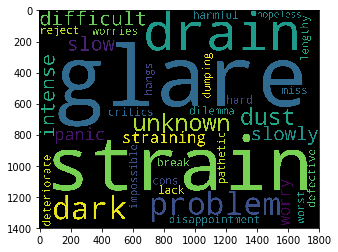

In [7]:
wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)




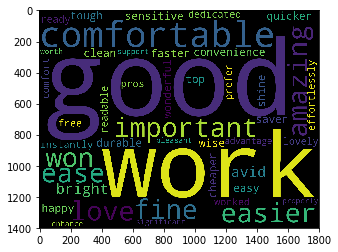

In [8]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)

plt.imshow(wordcloud_pos_in_pos)
